In [1]:
from pypal import PALSklearn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process.kernels import RBF, Matern
from pypal.pal.utils import exhaust_loop
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [2]:
def binh_korn(x, y):  # pylint:disable=invalid-name
    """https://en.wikipedia.org/wiki/Test_functions_for_optimization"""
    obj1 = 4 * x ** 2 + 4 * y ** 2
    obj2 = (x - 5) ** 2 + (y - 5) ** 2
    return -obj1, -obj2

In [3]:
def binh_korn_points():
    """Create a dataset based on the Binh-Korn test function"""
    x = np.linspace(0, 5, 100)  # pylint:disable=invalid-name
    y = np.linspace(0, 3, 100)  # pylint:disable=invalid-name
    array = np.array([binh_korn(xi, yi) for xi, yi in zip(x, y)])
    return np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)]), array

In [4]:
x, points = binh_korn_points()

In [61]:
#indices = np.array([0, 1, 4, 10, 15, 20, 35,  50, 70, 80, 90,  99])
indices = np.array( [4, 10, 15, 50, 70, 80])

In [59]:
model_0 = GaussianProcessRegressor(Matern(), 
                           n_restarts_optimizer=10)
model_1 = GaussianProcessRegressor(Matern(), n_restarts_optimizer=10)

In [62]:
model_0.fit(x[indices], points[indices,0])
model_1.fit(x[indices], points[indices,1])

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [63]:
predictions_0, std_0 = model_0.predict(x, return_std=True)
predictions_1, std_1 = model_1.predict(x, return_std=True)

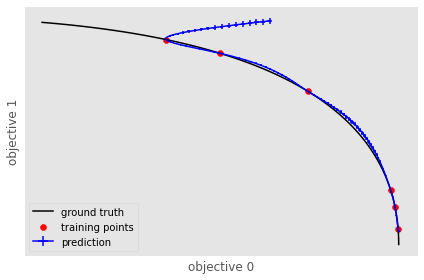

In [77]:
fig, ax = plt.subplots(1,1)

ax.plot(points[:,0], points[:,1], label='ground truth', c='k')
ax.scatter(points[indices,0], points[indices,1], label='training points', c='r')
ax.errorbar(predictions_0, predictions_1, xerr=std_0, yerr=std_1, label='prediction', c='b')

ax.set_xticks([])
ax.set_yticks([])

ax.legend(loc='lower left')
ax.set_xlabel('objective 0')
ax.set_ylabel('objective 1')

fig.tight_layout()

fig.savefig('overconfident_model.png', dpi=400, bbox_inches='tight')

In [6]:
from collections import defaultdict
resuls_dict = defaultdict(dict)

In [57]:
for eps in [0.01, 0.05, 0.1]:
    for beta_scale in [1,1/9, 1/20]: 
        model_0 = GaussianProcessRegressor(Matern(), 
                                   n_restarts_optimizer=10)
        model_1 = GaussianProcessRegressor(Matern(), 
                                           n_restarts_optimizer=10)
        palinstance = PALSklearn(x, [model_0, model_1], 2, epsilon=eps, delta=0.1, beta_scale=beta_scale)
        palinstance.update_train_set(indices, points[indices], np.array([[0.1, 0.1]] * len(indices)))
        palinstance.run_one_step()
        
        resuls_dict[eps][beta_scale] = palinstance

 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:117: UserWarning:Only one epsilon value provided,             will automatically expand to use the same value in every dimension
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:145: UserWarning:No goals provided, will assume that every dimension should be maximized
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/pal_base.py:345: UserWarning:The mean absolute error in crossvalidation is 2.65,
the mean variance is 0.10.
Your model might not be predictive and/or overconfident.
In the docs, you find hints on how to make GPRs more robust.
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:117: UserWarning:Only one epsilon value provided,             will automatically expand to use the same value in every dimension
 /Users/kevinmaikjablonka/Dropbox (LSM

Done. No unclassified point left


 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:117: UserWarning:Only one epsilon value provided,             will automatically expand to use the same value in every dimension
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:145: UserWarning:No goals provided, will assume that every dimension should be maximized
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/pal_base.py:345: UserWarning:The mean absolute error in crossvalidation is 2.65,
the mean variance is 0.10.
Your model might not be predictive and/or overconfident.
In the docs, you find hints on how to make GPRs more robust.


Done. No unclassified point left


 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:117: UserWarning:Only one epsilon value provided,             will automatically expand to use the same value in every dimension
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:145: UserWarning:No goals provided, will assume that every dimension should be maximized
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/pal_base.py:345: UserWarning:The mean absolute error in crossvalidation is 2.67,
the mean variance is 0.09.
Your model might not be predictive and/or overconfident.
In the docs, you find hints on how to make GPRs more robust.


Done. No unclassified point left


 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:117: UserWarning:Only one epsilon value provided,             will automatically expand to use the same value in every dimension
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/validate_inputs.py:145: UserWarning:No goals provided, will assume that every dimension should be maximized
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/pal/pal_base.py:345: UserWarning:The mean absolute error in crossvalidation is 2.67,
the mean variance is 0.09.
Your model might not be predictive and/or overconfident.
In the docs, you find hints on how to make GPRs more robust.


Done. No unclassified point left


In [53]:
from pypal.plotting import plot_pareto_front_2d

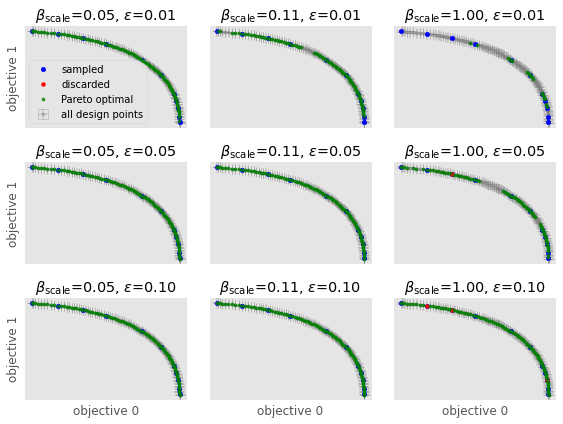

In [58]:
fig, ax = plt.subplots(3,3, sharex='all', sharey='all', figsize=(8,6))

for i, eps in enumerate([0.01, 0.05, 0.1]):
    for j, beta_scale in enumerate([1/20, 1/9, 1]): 
        p = resuls_dict[eps][beta_scale]
        # print((p.std[:,1] * np.sqrt(p.beta)).mean())
        plot_pareto_front_2d(p.means[:,0], 
                             p.means[:,1], 
                             p.std[:,0] * np.sqrt(p.beta), 
                             p.std[:,1] * np.sqrt(p.beta), 
                             p,
                             ax[i][j]
                            )
        ax[i][j].set_title(r'$\beta_\mathrm{{scale}}$={:.2f}, $\epsilon$={:.2f}'.format(beta_scale, eps))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

ax[0][0].legend()
ax[0][0].set_ylabel('objective 1')
ax[1][0].set_ylabel('objective 1')
ax[2][0].set_ylabel('objective 1')
ax[2][0].set_xlabel('objective 0')
ax[2][1].set_xlabel('objective 0')
ax[2][2].set_xlabel('objective 0')
fig.tight_layout()


fig.savefig('hyperparameter_illustration_01.png', dpi=400)

In [55]:
from pypal.plotting import make_jointplot

 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/plotting/__init__.py:193: MatplotlibDeprecationWarning:
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
 /Users/kevinmaikjablonka/Dropbox (LSMO)/Documents/open_source/PythonPAL/pypal/plotting/__init__.py:194: MatplotlibDeprecationWarning:
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


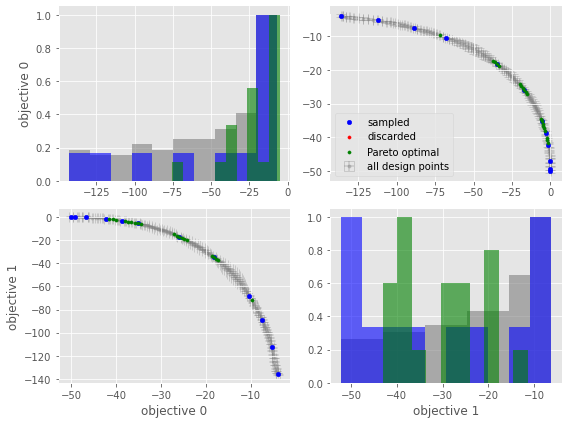

In [56]:
fig = make_jointplot(palinstance.means, palinstance)

In [57]:
fig.savefig('jointplot_beta_1_epsilon_001_delta_005.png', dpi=400, bbox_inches='tight')

Text(0, 0.5, 'objective 2')

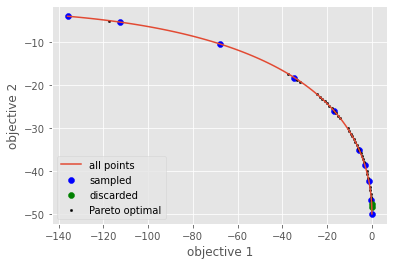

In [27]:
plt.plot(points[:,0], points[:,1], label='all points')
plt.scatter(points[palinstance.sampled_indices,0], 
            points[palinstance.sampled_indices,1], label='sampled', c='b')
plt.scatter(points[palinstance.discarded_indices,0], 
            points[palinstance.discarded_indices,1], label='discarded', c='g')

plt.scatter(points[palinstance.pareto_optimal_indices,0], 
            points[palinstance.pareto_optimal_indices,1], label='Pareto optimal', c='k', s=5)


plt.legend()
plt.xlabel('objective 1')
plt.ylabel('objective 2')